# Chapter 7 Hypothesis Tests

- Different types of errors
- Interpretation of p-values
- Concepts of **sensitivity** and **specificity**

## 7.1 Typical Analysis Procedure

- Old way : formulate a hypothesis, collect your data, and then accept or reject the hypothesis

- Now days : look at the data, and generate models which may explain your data. Then  determine the best fit parameters for these models, and check these models, typically by looking at the residuals

> 1) Visually inspect the data.

> 2) Find extreme samples, and check them carefully.

> 3) Determine the data-type of the values.

> 4) If the data are continuous, check whether or not they are normally distributed.

> 5) Select and apply the appropriate test, or start with the model-based analysis of
the data.


### 7.1.1 Data Screening and Outliers

- There is no unique definition for outliers
- for normally distributed samples they are often defined as data that lie either more than **1.5*IQR (inter- quartile range), or more than two standard deviations**, from the sample mean

### 7.1.2 Normality Check

- Parametric tests assume that the data can be well described by a distribution that is defined by one or more parameters, **in most cases by a normal distribution**. For the given data set, the best-fit parameters for this distribution are then determined, together with their confidence intervals, and interpreted

#### a) Probability-Plots

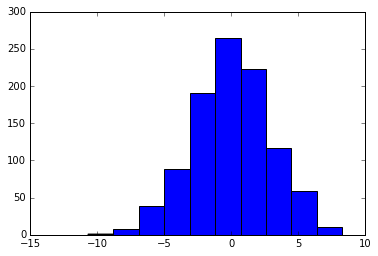

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from statsmodels.stats.diagnostic import lillifors

numData = 1000
myMean = 0
mySD = 3

# To get reproducable values, I provide a seed value
np.random.seed(1234)   

# Generate and show random data
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]
plt.hist(data)
plt.show()

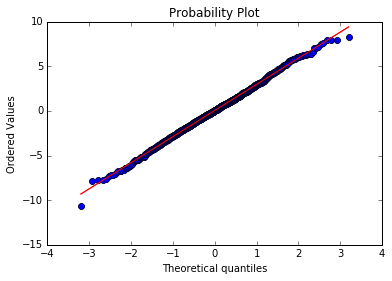

In [3]:
_ = stats.probplot(data, plot=plt)
plt.show()


#### b) Tests for Normality

- 1) Tests based on comparison (“best fit”) with a given distribution, often specified in terms of its CDF. Examples are the Kolmogorov–Smirnov test, the Lilliefors test, the Anderson–Darling test, the Cramer–von Mises criterion, as well as the Shapiro–Wilk and Shapiro–Francia tests.

- 2) Tests based on descriptive statistics of the sample. Examples are the skewness test, the kurtosis test, the D’Agostino–Pearson omnibus test, or the Jarque–Bera test.

In [4]:
pVals = pd.Series()
pFewVals = pd.Series()

# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus']    = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)

# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lillifors(data)
_, pFewVals['Lilliefors'] = lillifors(fewData)

# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')

print('p-values for all {0} data points: ----------------'.format(len(data)))
print(pVals)
print('p-values for the first 100 data points: ----------------')
print(pFewVals)

p-values for all 1000 data points: ----------------
Omnibus               0.913684
Shapiro-Wilk          0.558474
Lilliefors            0.569781
Kolmogorov-Smirnov    0.898967
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               0.004530
Shapiro-Wilk          0.047102
Lilliefors            0.183717
Kolmogorov-Smirnov    0.640677
dtype: float64


### 7.1.3 Transformation

- If the data deviate significantly from a normal distribution, it is sometimes possible to make the distribution approximately normal by transforming the data. For example, data often have values that can only be positive (e.g., the size of persons), and that have long positive tail: such data can often be made normal by applying a log transform.

----

## 7.2 Hypothesis Concept, Errors, p-Value, and Sample Size

### 7.2.1 An Example